In [1]:
import numpy as np
from qutip import*
import time
import matplotlib.pyplot as plt
import itertools as it
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
        
def project_to_qubit(rho):
    N = int(len(rho.dims[0]))
    projector = Qobj(np.array([[1, 0, 0],[0, 1, 0]]))
    tot_proj = tensor([projector]*N)
    rho_proj = tot_proj*rho*tot_proj.dag()
    return rho_proj.unit()
        
Nqubits= 1
Nlevels= 3
Paulis_gt = 2.00e-8
CZ_gt = 2.83e-7
gate_time_CCZS = CZ_gt/(sqrt(2))
Diss = [27.35e-6]
Alpha = -2*pi*210e6
ZZ_list = []
ZZ_strength = []


T1s = [27.35e-6]
T2s = [45.21e-6]

Deph = []
for i in range(1):
    _1byT2 = 1/T2s[i]
    _1byT1 = 1/(2*T1s[i])
    Deph.append(1/(_1byT2 - _1byT1))
    
import Chalmers_Simulator_mesolve as CS

The quantum gates which are modelled in this code and their notations-
--------------------------------------------------------------------------------
Pauli X 		 PX
Pauli Y 		 PY
Pauli Z 		 PZ
Hadamard 		 HD
PI12 			 1->2 transition


Controlled Z 		 CZ 		 Format:Tar_Con=[[control, target]]
Controlled CZS 		 CCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]
Sqrt Controlled CZS 	 SCCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]


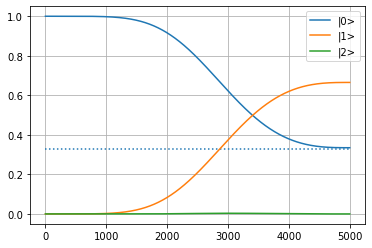

In [2]:
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

Ini = tensor(basis(3,0))
gate=[]
gate.append(Add_gate(name=["PX"    ], Tar_Con=[0],         angle=[2*np.arccos(1/sqrt(3))]        ))



fstate1, states = CS.Execute(Hamiltonian, [], gate, Ini)
O000 = tensor(basis(3,0))
O100 = tensor(basis(3,1))
O200 = tensor(basis(3,2))

plt.plot(expect(O000*O000.dag(), states), label = '|0>')
plt.plot(expect(O100*O100.dag(), states), label = '|1>')
plt.plot(expect(O200*O200.dag(), states), label = '|2>')
plt.hlines(0.33, 0,5000, linestyle = ':')

plt.grid('on')
plt.legend()

## Fidelity of Pauli Y [2cos$^{-1}$(1/$\sqrt{3}$] gate)

In [3]:
from qutip.qip.circuit import QubitCircuit
qc = QubitCircuit(N=1)
qc.add_gate("RX", targets=0, arg_value = (2*np.arccos(1/sqrt(3))))
Z = qc.propagators()[0]
psi = Z*tensor(basis(2,0))

fidelity(ket2dm(psi), project_to_qubit(ket2dm(fstate1)))

0.9999987235432445

## Fidelity of PI12 gate

In [6]:
# Fidelity of PI12 gate
Ini = tensor(basis(3,1))
gate=[]
gate.append(Add_gate(name=["PI12"    ], Tar_Con=[0],         angle=[pi]        ))

Exstate, _ = CS.Execute(Hamiltonian, [], gate, Ini)
fidelity(Exstate, basis(3,2))

0.9999999922781592

## Dynamics during the algorithm

In [1]:
import numpy as np
from qutip import*
import time
import matplotlib.pyplot as plt
import itertools as it
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
                
Diss = [27.35e-6, 27.35e-6, 27.35e-6]
Alpha = -2*pi*210e6
ZZ_list = [[0,1]]
ZZ_strength = [0]

def project_to_qubit(rho):
    N = int(len(rho.dims[0]))
    projector = Qobj(np.array([[1, 0, 0],[0, 1, 0]]))
    tot_proj = tensor([projector]*N)
    rho_proj = tot_proj*rho*tot_proj.dag()
    return rho_proj.unit()


Nqubits= 3
Nlevels= 3
Paulis_gt = 2.00e-8
CZ_gt = 2.83e-7
gate_time_CCZS = CZ_gt/(sqrt(2))
Diss = [27.35e-6, 27.35e-6, 27.35e-6]
Alpha = -2*pi*210e6
ZZ_list = []
ZZ_strength = []

T1s = [27.35e-6, 39.73e-6, 34.73e-6]
T2s = [45.21e-6, 57.67e-6, 21.49e-6]

Deph = []
for i in range(3):
    _1byT2 = 1/T2s[i]
    _1byT1 = 1/(2*T1s[i])
    Deph.append(1/(_1byT2 - _1byT1))
    
    
# Import the developed package
import Chalmers_Simulator_mesolve as CS

The quantum gates which are modelled in this code and their notations-
--------------------------------------------------------------------------------
Pauli X 		 PX
Pauli Y 		 PY
Pauli Z 		 PZ
Hadamard 		 HD
PI12 			 1->2 transition


Controlled Z 		 CZ 		 Format:Tar_Con=[[control, target]]
Controlled CZS 		 CCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]
Sqrt Controlled CZS 	 SCCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]


Fidelity of this gate is 0.9999987256506686


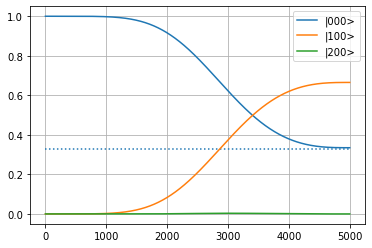

In [2]:
# Create Hamiltonian and collapse operators
# (1.221*(pi/2))
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, gate_time_CCZS, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])


Ini = tensor(basis(3,0), basis(3,0), basis(3,0))

gate=[]
gate.append(Add_gate(name=["PY"    ], Tar_Con=[0],         angle=[2*np.arccos(1/sqrt(3))]        ))

fstate1, states = CS.Execute(Hamiltonian, [], gate, Ini)
O000 = tensor(basis(3,0), basis(3,0), basis(3,0))
O100 = tensor(basis(3,1), basis(3,0), basis(3,0))
O200 = tensor(basis(3,2), basis(3,0), basis(3,0))

plt.plot(expect(O000*O000.dag(), states), label = '|000>')
plt.plot(expect(O100*O100.dag(), states), label = '|100>')
plt.plot(expect(O200*O200.dag(), states), label = '|200>')

plt.hlines(0.33, 0,5000, linestyle = ':')
plt.grid('on')
plt.legend()


from qutip.qip.circuit import QubitCircuit
qc = QubitCircuit(N=3)
qc.add_gate("RY", targets=0, arg_value = (2*np.arccos(1/sqrt(3))))
Z = qc.propagators()[0]

psi = Z*tensor(basis(2,0), basis(2,0), basis(2,0))

print("Fidelity of this gate is" , fidelity(psi*psi.dag(), project_to_qubit(fstate1*fstate1.dag())))

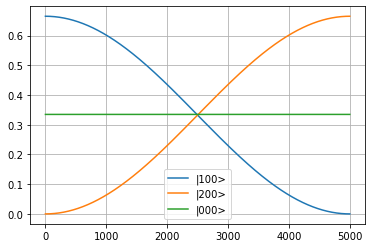

In [3]:
gate=[]
gate.append(Add_gate(name=["PI12"    ], Tar_Con=[[0]],       angle=[pi]                           ))

fstate2, states = CS.Execute(Hamiltonian, [], gate, fstate1)
O200 = tensor(basis(3,2), basis(3,0), basis(3,0))
plt.plot(expect(O100*O100.dag(), states), label = '|100>')
plt.plot(expect(O200*O200.dag(), states), label = '|200>')
plt.plot(expect(O000*O000.dag(), states), label = '|000>')

plt.grid('on')
plt.legend()

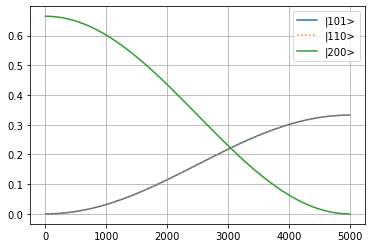

In [4]:
gate=[]
gate.append(Add_gate(name=["SCCZS"    ], Tar_Con=[[0,1,2,0]], angle=[0]                          ))

fstate3, states = CS.Execute(Hamiltonian, [], gate, fstate2)
O200 = tensor(basis(3,2), basis(3,0), basis(3,0))
O110 = tensor(basis(3,1), basis(3,1), basis(3,0))
O101 = tensor(basis(3,1), basis(3,0), basis(3,1))

plt.plot(expect(O101*O101.dag(), states), label = '|101>')
plt.plot(expect(O110*O110.dag(), states), label = '|110>', linestyle = ':')
plt.plot(expect(O200*O200.dag(), states), label = '|200>')
plt.grid('on')
plt.legend()

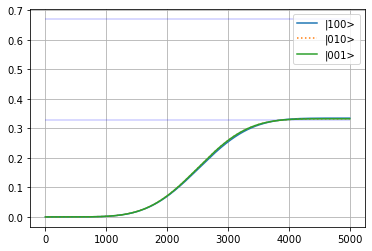

In [5]:
gate=[]
gate.append(Add_gate(name=["PX"    ], Tar_Con=[[0]],         angle=[pi]        ))

fstate4, states = CS.Execute(Hamiltonian, [], gate, fstate3)
O100 = tensor(basis(3,1), basis(3,0), basis(3,0))
O010 = tensor(basis(3,0), basis(3,1), basis(3,0))
O001 = tensor(basis(3,0), basis(3,0), basis(3,1))
plt.plot(expect(O100*O100.dag(), states), label = '|100>')
plt.plot(expect(O010*O010.dag(), states), label = '|010>', linestyle = ':')
plt.plot(expect(O001*O001.dag(), states), label = '|001>')
plt.hlines(0.33, 0, 5000, 'b', linewidth = 0.3)
plt.hlines(0.67, 0, 5000, 'b', linewidth = 0.3)

plt.grid('on')
plt.legend()

In [16]:
Qobj(project_to_qubit(ket2dm(fstate4)).diag())

Quantum object: dims = [[8], [1]], shape = (8, 1), type = ket
Qobj data =
[[2.87886499e-05]
 [3.32562503e-01]
 [3.32562503e-01]
 [0.00000000e+00]
 [3.34813196e-01]
 [1.64980577e-05]
 [1.64980577e-05]
 [0.00000000e+00]]

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

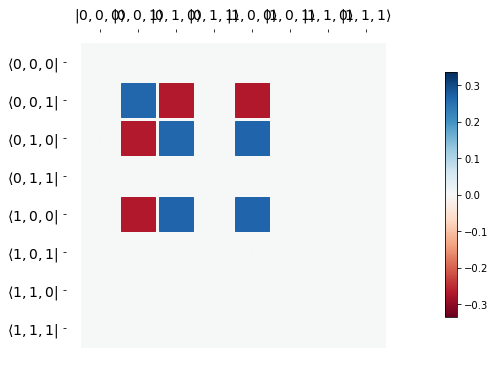

In [12]:
hinton(project_to_qubit(fstate4*fstate4.dag()))

(<Figure size 576x432 with 2 Axes>, <AxesSubplot:>)

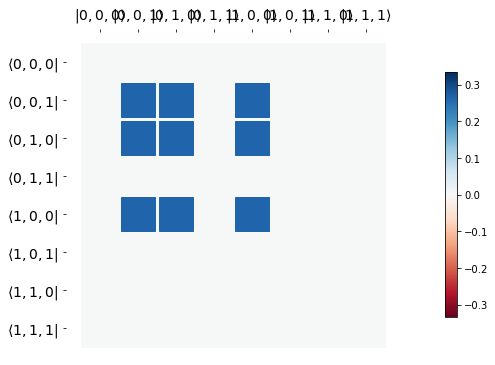

In [13]:
W001 = tensor(basis(2,0), basis(2,0), basis(2,1))
W010 = tensor(basis(2,0), basis(2,1), basis(2,0))
W100 = tensor(basis(2,1), basis(2,0), basis(2,0))
Wstate = (W001 + W010 + W100).unit()
hinton(Wstate*Wstate.dag())